<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#결정-트리의-앙상블" data-toc-modified-id="결정-트리의-앙상블-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>결정 트리의 앙상블</a></span><ul class="toc-item"><li><span><a href="#랜덤포레스트" data-toc-modified-id="랜덤포레스트-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>랜덤포레스트</a></span></li><li><span><a href="#랜덤-포레스트-구축" data-toc-modified-id="랜덤-포레스트-구축-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>랜덤 포레스트 구축</a></span></li><li><span><a href="#랜덤-포레스트-분석" data-toc-modified-id="랜덤-포레스트-분석-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>랜덤 포레스트 분석</a></span></li></ul></li></ul></div>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import mglearn
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# 결정 트리의 앙상블
**앙상블ensemble**은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다. 머신러닝에는 이런 종류의 모델이 많지만, 그중 두 앙상블 모델이 분류와 회귀 문제에 다양한 데이터셋에 효과적이라고 입증됐다. 랜덤 포레스트random forest, 그래디언트 부스팅gradient boosting 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

## 랜덤포레스트
결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다. 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초하다. 예컨대 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명됐다.

이런 전략을 구현하려면 결정 트리를 많이 만들어야 한다. 각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 한다. 랜덤 포레스트는 이름에서 알 수 있듯이 트리들이 달라지도록 트리 생성 시 무작위성을 주입한다. 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두 가지가 있다. 

1. 트리를 만들 때 데이터 포인트를 무작위로 선택하는 방법
2. 분할 테스트에서 특성을 무작위로 선택하는 방법

## 랜덤 포레스트 구축
랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다 (RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수). 여기에서는 트리가 10개 필요하다고 가정하자. 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다. 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플bootstrap sample을 생성한다. 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출한다 (한 샘플이 여러 번 중복 추출될 수 있다). 이 데이터셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락될 수 있고(대략 1/3 정도) 어떤 데이터 포인트는 중복되어 들어 있을 수 있다.

예) ['a', 'b', 'c', 'd']에서 부트스트랩 샘플을 만든다. ['b', 'd', 'd', 'c'], ['d', 'a', 'd', 'a'] 도 될 수 있다.

그 다음 이렇게 만든 데이터셋으로 결정 트리를 만든다. 그런데 우리가 본 결정 트리 알고리즘과 조금 다르다. 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다. 몇 개의 특성을 고를지는 max_features 매개변수로 조정할 수 있다. 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만든다.

부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 한다. 또 각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기는 각기 다른 특성 부분집합을 사용한다. 이 두 메커니즘이 합쳐져서 **랜덤 포레스트의 모든 트리가 서로 달라지**도록 만든다.

핵심 매개변수는 max_features이다. max_features를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다. (하지만 부트스트랩 샘플링으로 인한 무작위성은 그대로이다) max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다. 결국 max_features 값을 크게 하면 랜덤 포레스트이 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것이다. max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어진다.

랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만든다. 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만든다. 분류의 경우는 약한 투표 전략을 사용한다. 즉 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 한다. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 된다.

## 랜덤 포레스트 분석
two_moon 데이터셋으로 트리 5개로 구성된 랜덤 포레스트 모델을 만들자.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

랜덤 포레스트 안에 만들어진 트리는 estimator_ 속성에 저장됨. 각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화하자.

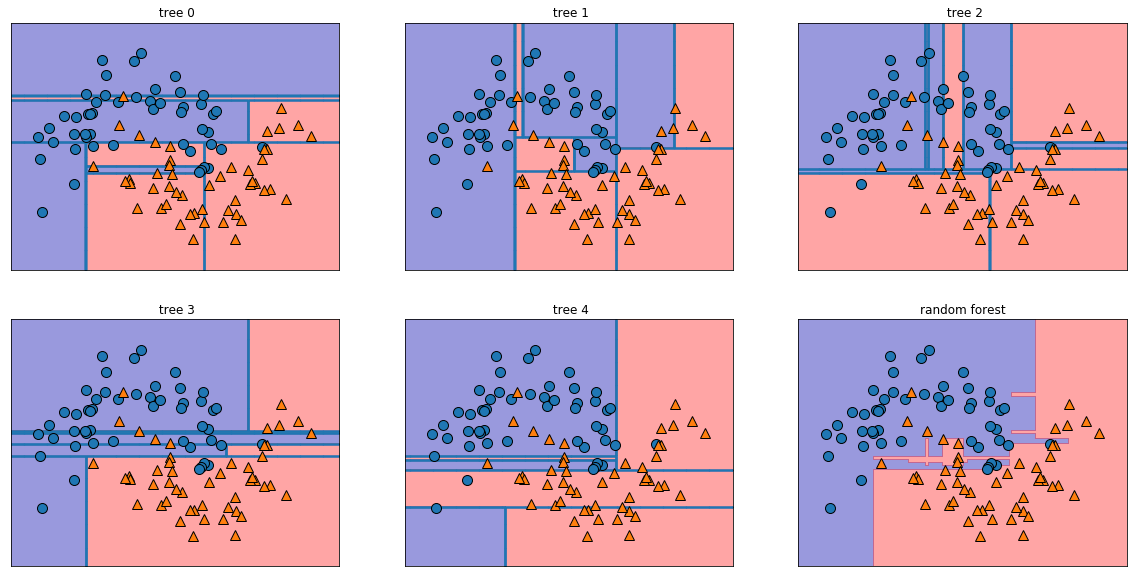

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(" tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)